<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/TF_Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model


In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2023-09-07 23:18:00--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.40MB/s    in 0.3s    

2023-09-07 23:18:01 (1.40 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#drop unnecessary columns
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#rename columns
df.columns=["labels", "data"]

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#create binary labels
df["b_labels"]=df["labels"].map({"ham":0,"spam":1})
Y=df["b_labels"].values


In [13]:
df_train, df_test, Ytrain, Ytest=train_test_split(df["data"], Y, test_size=0.33)

In [32]:
#convert sentences to sequences of integers

MAX_VOCAB_SIZE=20000
tokenizer =Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [33]:
#get word -> integer mapping
word2idx=tokenizer.word_index
V=len(word2idx)
print("found %s unique tokens" % V)

found 7121 unique tokens


In [34]:
#pad sequence so that we get a N* T matrix
data_train = pad_sequences(sequences_train)
print("shape of data train tensor", data_train.shape)

#get sequence length
T=data_train.shape[1]


shape of data train tensor (3733, 162)


In [35]:
data_test=pad_sequences(sequences_test, maxlen=T)
print("shape of data test tensor", data_test.shape)

shape of data test tensor (1839, 162)


In [36]:
#create the model

#we get to choose embedding dimensionality
D=20

#hidden state dimensionality
M=15

i= Input(shape=(T,))
x= Embedding(V+1,D)(i) # the size of the array must be plus one more than the actual maximum index you're going to use. So for example, if your maximum index is 99, that means the array must be of size 100.
x= LSTM(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x) #Since we saw that this works quite well for learning long term dependencies.
x=Dense(1, activation="sigmoid")(x)

model=Model(i,x) #we're going to have a dense layer with sigmoid activation since spam detection is a binary classification problem

In [37]:
#compile and fit
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print("training model")
r=model.fit (
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest)
)

training model
Epoch 1/10
117/117 [==============================] - 17s 120ms/step - loss: 0.4879 - accuracy: 0.8513 - val_loss: 0.3291 - val_accuracy: 0.8608
Epoch 2/10
117/117 [==============================] - 20s 169ms/step - loss: 0.2473 - accuracy: 0.8685 - val_loss: 0.2156 - val_accuracy: 0.8608
Epoch 3/10
117/117 [==============================] - 15s 128ms/step - loss: 0.1659 - accuracy: 0.9494 - val_loss: 0.1522 - val_accuracy: 0.9750
Epoch 4/10
117/117 [==============================] - 15s 129ms/step - loss: 0.1111 - accuracy: 0.9898 - val_loss: 0.1106 - val_accuracy: 0.9821
Epoch 5/10
117/117 [==============================] - 13s 112ms/step - loss: 0.0785 - accuracy: 0.9941 - val_loss: 0.0907 - val_accuracy: 0.9842
Epoch 6/10
117/117 [==============================] - 14s 116ms/step - loss: 0.0611 - accuracy: 0.9946 - val_loss: 0.0761 - val_accuracy: 0.9859
Epoch 7/10
117/117 [==============================] - 16s 135ms/step - loss: 0.0485 - accuracy: 0.9965 - val_loss: 

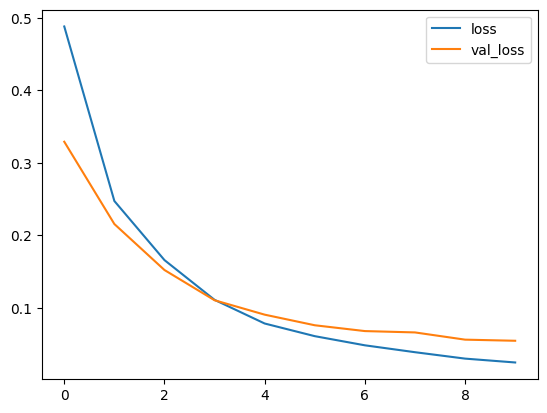

In [39]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

So it looks like we do pretty good, almost 100% accuracy.

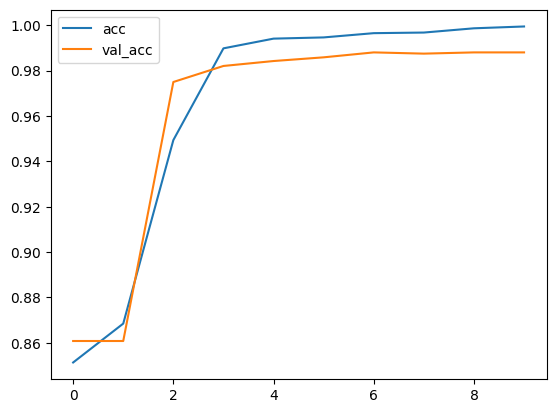

In [40]:
#plot accuracy per iteration
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

And what's nice about this is it converges pretty fast. Also just ten epochs.